# Analyze Vanillas 

@roman_avj

8 Nvv 2023

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [ ]:
# Data

In [19]:
# read all csv files from ../../results/vanillas/* and concatenate them. Save the name of the file in the column 'file'
def read_all_csvs(path, pattern = r'(.+?)_(all|rent)_data.csv'):
    all_files = os.listdir(path)
    df = pd.DataFrame()
    for file in all_files:
        if file.endswith(".csv"):
            df_temp = pd.read_csv(path + file)
            # tidy file name. Get only the name of the model, i.e. match * before '_(all|rent)_data.csv'
            file_name_tidy = re.search(pattern, file).group(1)
            df_temp['model'] = file_name_tidy
            df = pd.concat([df, df_temp])

    # tidy column names
    df = df[['model', 'type_info', 'listing_type', 'property_type', 'rmse', 'cindex']]
    df['listing_type'] = df['listing_type'].fillna('for-rent')
    df = df.sort_values(by=['model', 'type_info', 'listing_type', 'property_type'], ignore_index=True)

    return df


# read all csv files from ../../results/vanillas/* and concatenate them. Save the name of the file in the column 'file'
dir_path = '../../results/vanillas/'
df_models = read_all_csvs(dir_path)

In [58]:
df_models.head(10)

,model,type_info,listing_type,property_type,rmse,cindex
0,aft,ALL_DATA,for-rent,apartment,23.866763,0.539300
1,aft,ALL_DATA,for-rent,house,27.130250,0.518060
2,aft,ALL_DATA,for-sale,apartment,34.540725,0.563288
3,aft,ALL_DATA,for-sale,house,36.703321,0.548649
4,aft,RENT_DATA,for-rent,apartment,23.563299,0.529221
5,aft,RENT_DATA,for-rent,house,25.290228,0.530107
6,avg,ALL_DATA,for-rent,apartment,28.805872,0.508525
7,avg,ALL_DATA,for-rent,house,31.209766,0.512267
8,avg,ALL_DATA,for-sale,apartment,39.861224,0.484399
9,avg,ALL_DATA,for-sale,house,40.580432,0.510323


# All Data vs Rent Data

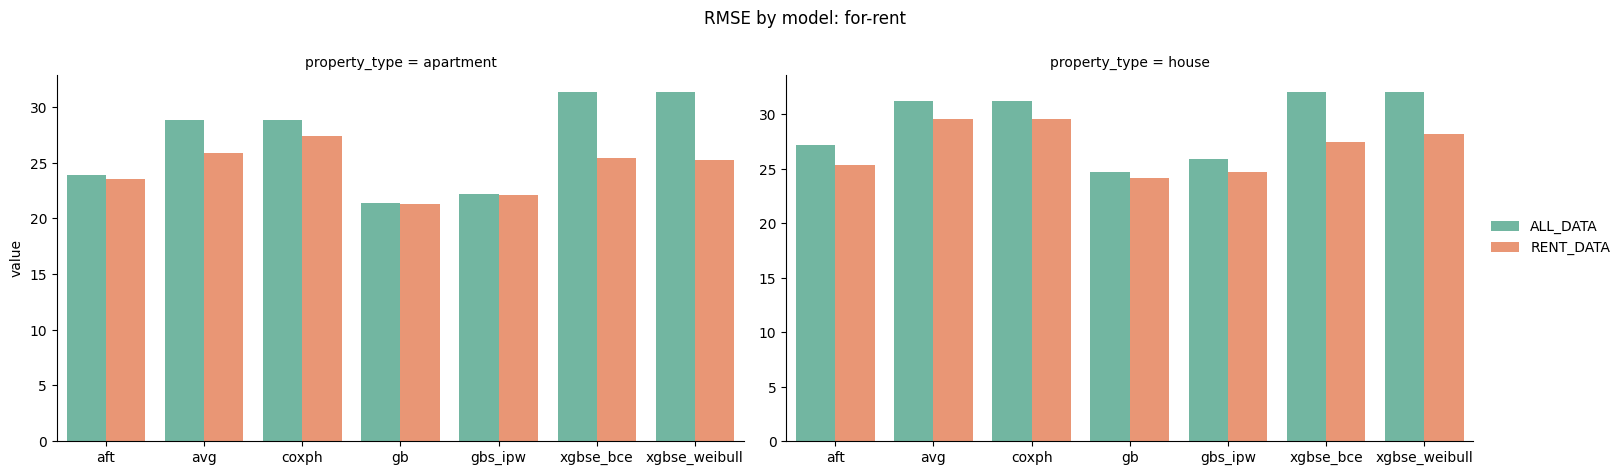

In [50]:
# get info
df_plot = (
    df_models.copy()
    .melt(id_vars=['model', 'type_info', 'listing_type', 'property_type'], value_vars=['rmse', 'cindex'])
    .rename(columns={'variable': 'metric'})
    .query("listing_type == 'for-rent' & metric == 'rmse'")
    .sort_values(by=['model', 'type_info', 'listing_type', 'property_type'])
    )

# plot bar plot by model vs value, dodge by type_info facet grid by metric & listing_type
g = sns.FacetGrid(df_plot, col='property_type', sharey=False, sharex=False, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='model', y='value', hue='type_info', dodge=True, palette='Set2')
g.add_legend()
g.set_axis_labels("", "value")
g.fig.suptitle('RMSE by model: for-rent')
g.fig.subplots_adjust(top=.85)
plt.show()

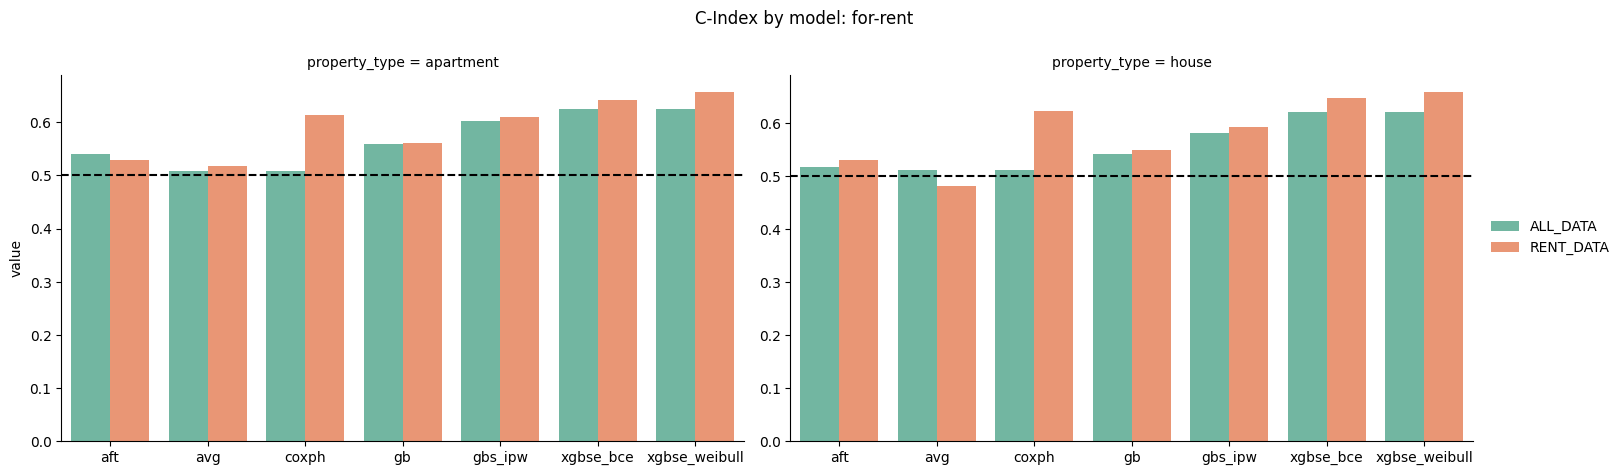

In [64]:
# get info
df_plot = (
    df_models.copy()
    .melt(id_vars=['model', 'type_info', 'listing_type', 'property_type'], value_vars=['rmse', 'cindex'])
    .rename(columns={'variable': 'metric'})
    .query("listing_type == 'for-rent' & metric == 'cindex'")
    .sort_values(by=['model', 'type_info', 'listing_type', 'property_type'])
    )

# plot bar plot by model vs value, dodge by type_info facet grid by metric & listing_type
g = sns.FacetGrid(df_plot, col='property_type', sharey=False, sharex=False, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='model', y='value', hue='type_info', dodge=True, palette='Set2')
# add 0.5 line
g.map(plt.axhline, y=0.5, ls='--', c='black')
g.add_legend()
g.set_axis_labels("", "value")
g.fig.suptitle('C-Index by model: for-rent')
g.fig.subplots_adjust(top=.85)
plt.show()

# Models

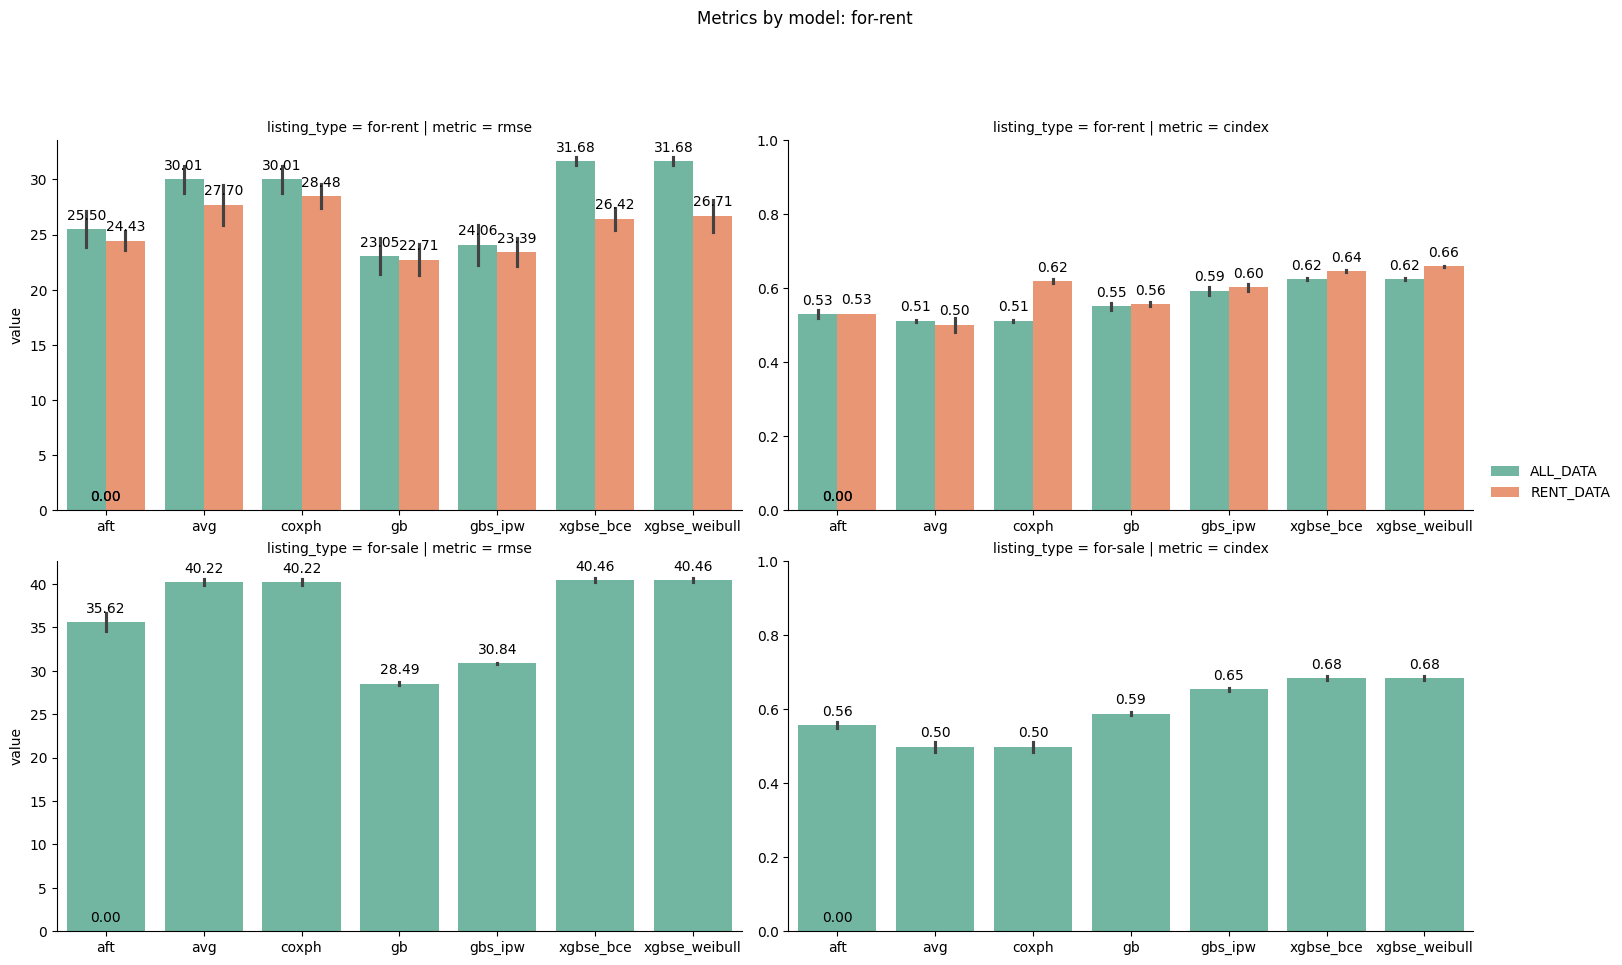

In [69]:
# get info
df_plot = (
    df_models.copy()
    .melt(id_vars=['model', 'type_info', 'listing_type', 'property_type'], value_vars=['rmse', 'cindex'])
    .rename(columns={'variable': 'metric'})
    .sort_values(by=['model', 'type_info', 'listing_type', 'property_type'])
    )

# plot bar plot by model vs value, dodge by type_info facet grid by metric & listing_type
g = sns.FacetGrid(df_plot, row='listing_type', col='metric', sharey=False, sharex=False, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='model', y='value', hue='type_info', dodge=True, palette='Set2')
# add values to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# kegend
g.add_legend()
# set ylims for cindex as the values are between 0 and 1
g.axes[0, 1].set_ylim(0, 1)
g.axes[1, 1].set_ylim(0, 1)
g.set_axis_labels("", "value")
g.fig.suptitle('Metrics by model: for-rent')
g.fig.subplots_adjust(top=.85)
plt.show()